# Homework 1
Christopher Liu

In [1]:
from mnist import MNIST
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from matplotlib import rcParams

from sklearn.linear_model import Ridge, Lasso, LinearRegression

## Setting things up

In [2]:
#importing data
mndata = MNIST('data')

images_tr, labels_tr = mndata.load_training()
images_tt, labels_tt = mndata.load_testing()

In [3]:
#converting to numpy array
images_tr = np.asarray(images_tr)
labels_tr = np.asarray(labels_tr)

images_tt = np.asarray(images_tt)
labels_tt = np.asarray(labels_tt)

In [4]:
A_tr = images_tr
A_tt = images_tt

#converting labels
B_tr = np.zeros((len(labels_tr),10))

for i in range(0,len(labels_tr)):
    B_tr[i,labels_tr[i]] = 1
    
B_tt = np.zeros((len(labels_tt),10))

for i in range(0,len(labels_tt)):
    B_tt[i,labels_tt[i]] = 1

## Creating 6 folds from the training data

In [5]:
np.random.seed(1)
perm = np.random.permutation(60000) #creating a random permutation

In [6]:
#randomly splitting the training data into 6 folds
A1_tr = A_tr[perm[0:10000],:]
A2_tr = A_tr[perm[10000:20000],:]
A3_tr = A_tr[perm[20000:30000],:]
A4_tr = A_tr[perm[30000:40000],:]
A5_tr = A_tr[perm[40000:50000],:]
A6_tr = A_tr[perm[50000:60000],:]

B1_tr = B_tr[perm[0:10000],:]
B2_tr = B_tr[perm[10000:20000],:]
B3_tr = B_tr[perm[20000:30000],:]
B4_tr = B_tr[perm[30000:40000],:]
B5_tr = B_tr[perm[40000:50000],:]
B6_tr = B_tr[perm[50000:60000],:]

## Create Models

In [7]:
def plt_coeff(x):
    #creates a pseudocolor plot of the pixel weights    
    plt.rcParams['figure.figsize'] = [10, 10]
    rcParams.update({'font.size': 25})
    
    divnorm = colors.DivergingNorm(vmin=np.amin(x), vcenter=0, vmax=np.amax(x))

    fig = plt.pcolor(x,cmap='bwr', rasterized=True, norm = divnorm)
    plt.colorbar(fig)
    plt.xlabel('Weights')
    plt.ylabel('Pixel')

In [8]:
def plt_coeff_norm(x):
    #creates a normalized pseudocolor plot of the pixel weights 
    plt.rcParams['figure.figsize'] = [10, 10]
    rcParams.update({'font.size': 25})
    
    norm = np.abs(x)/np.amax(x)
    fig = plt.pcolor(norm,cmap='YlOrRd', rasterized=True, norm=colors.LogNorm(vmin=1e-8, vmax=1))
    plt.colorbar(fig)
    plt.xlabel('Weights')
    plt.ylabel('Pixel')

### numpy pseudoinverse

In [9]:
#computing the pseudoinverse on each fold
x_psd1 = np.linalg.pinv(A1_tr)@B1_tr
x_psd2 = np.linalg.pinv(A2_tr)@B2_tr
x_psd3 = np.linalg.pinv(A3_tr)@B3_tr
x_psd4 = np.linalg.pinv(A4_tr)@B4_tr
x_psd5 = np.linalg.pinv(A5_tr)@B5_tr
x_psd6 = np.linalg.pinv(A6_tr)@B6_tr

#averaging the maps
x_psd = (x_psd1+x_psd2+x_psd3+x_psd4+x_psd5+x_psd6)/6

In [10]:
np.count_nonzero(x_psd)

7670

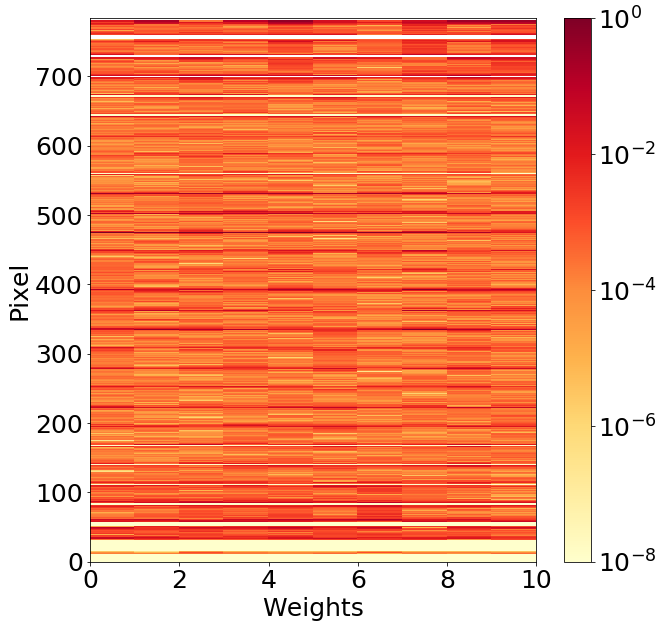

In [99]:
plt_coeff_norm(x_psd)
plt.savefig('psd6.png');

In [12]:
#1 fold
x_psd_all =  np.linalg.pinv(A_tr)@B_tr

### Lasso

In [13]:
clfl = Lasso(alpha=0.5)
clfl.fit(A1_tr, B1_tr)
x_lso1 = clfl.coef_
x_lso1 = x_lso1.transpose()

clfl.fit(A2_tr, B2_tr)
x_lso2 = clfl.coef_
x_lso2 = x_lso2.transpose()

clfl.fit(A3_tr, B3_tr)
x_lso3 = clfl.coef_
x_lso3 = x_lso3.transpose()

clfl.fit(A4_tr, B4_tr)
x_lso4 = clfl.coef_
x_lso4 = x_lso4.transpose()

clfl.fit(A5_tr, B5_tr)
x_lso5 = clfl.coef_
x_lso5 = x_lso5.transpose()

clfl.fit(A6_tr, B6_tr)
x_lso6 = clfl.coef_
x_lso6 = x_lso6.transpose()

In [14]:
#averaging the maps
x_lso = (x_lso1+x_lso2+x_lso3+x_lso4+x_lso5+x_lso6)/6

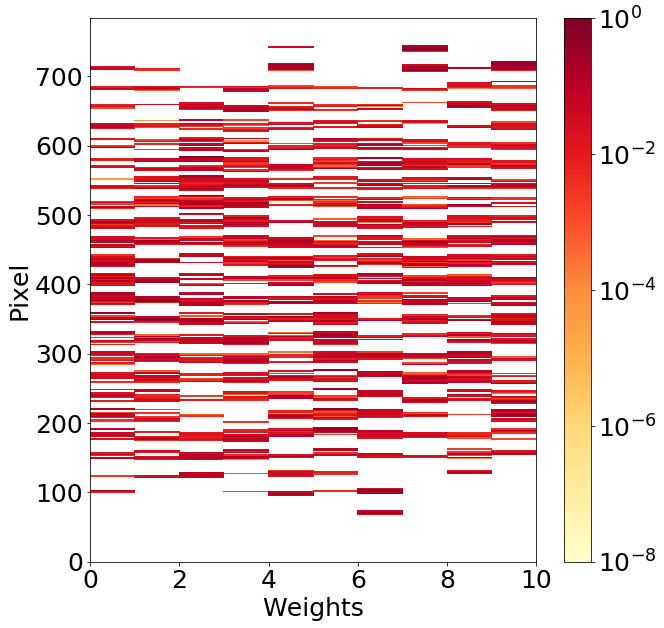

In [15]:
plt_coeff_norm(x_lso)
plt.savefig('lso6.png');

In [16]:
#1 fold
clfl.fit(A_tr,B_tr)
x_lso_all = clfl.coef_
x_lso_all = x_lso_all.transpose()

### Ridge

In [17]:
#6 folds
clfr = Ridge(alpha=0.5)
clfr.fit(A1_tr, B1_tr)
x_rdg1 = clfr.coef_
x_rdg1 = x_rdg1.transpose()

clfr.fit(A2_tr, B2_tr)
x_rdg2 = clfr.coef_
x_rdg2 = x_rdg2.transpose()

clfr.fit(A3_tr, B3_tr)
x_rdg3 = clfr.coef_
x_rdg3 = x_rdg3.transpose()

clfr.fit(A4_tr, B4_tr)
x_rdg4 = clfr.coef_
x_rdg4 = x_rdg4.transpose()

clfr.fit(A5_tr, B5_tr)
x_rdg5 = clfr.coef_
x_rdg5 = x_rdg5.transpose()

clfr.fit(A6_tr, B6_tr)
x_rdg6 = clfr.coef_
x_rdg6 = x_rdg6.transpose()

In [18]:
#averaging the maps
x_rdg = (x_rdg1+x_rdg2+x_rdg3+x_rdg4+x_rdg5+x_rdg6)/6

In [19]:
np.count_nonzero(x_rdg)

7170

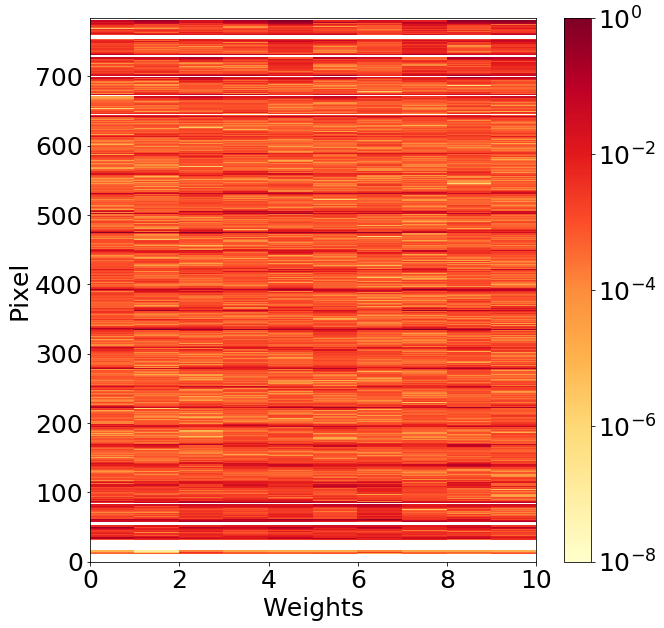

In [20]:
plt_coeff_norm(x_rdg)
plt.savefig('rdg6.png');

In [21]:
#1 fold
clfr.fit(A_tr,B_tr)
x_rdg_all = clfr.coef_
x_rdg_all = x_rdg_all.transpose()

### Linear Regression

In [22]:
#6 folds
linreg = LinearRegression().fit(A1_tr, B1_tr)
x_lr1 = linreg.coef_
x_lr1 = x_lr1.transpose()

linreg = LinearRegression().fit(A2_tr, B2_tr)
x_lr2 = linreg.coef_
x_lr2 = x_lr2.transpose()

linreg = LinearRegression().fit(A3_tr, B3_tr)
x_lr3 = linreg.coef_
x_lr3 = x_lr3.transpose()

linreg = LinearRegression().fit(A4_tr, B4_tr)
x_lr4 = linreg.coef_
x_lr4 = x_lr4.transpose()

linreg = LinearRegression().fit(A5_tr, B5_tr)
x_lr5 = linreg.coef_
x_lr5 = x_lr5.transpose()

linreg = LinearRegression().fit(A6_tr, B6_tr)
x_lr6 = linreg.coef_
x_lr6 = x_lr6.transpose()

In [23]:
x_lr = (x_lr1+x_lr2+x_lr3+x_lr4+x_lr5+x_lr6)/6

In [24]:
np.count_nonzero(x_lr)

7670

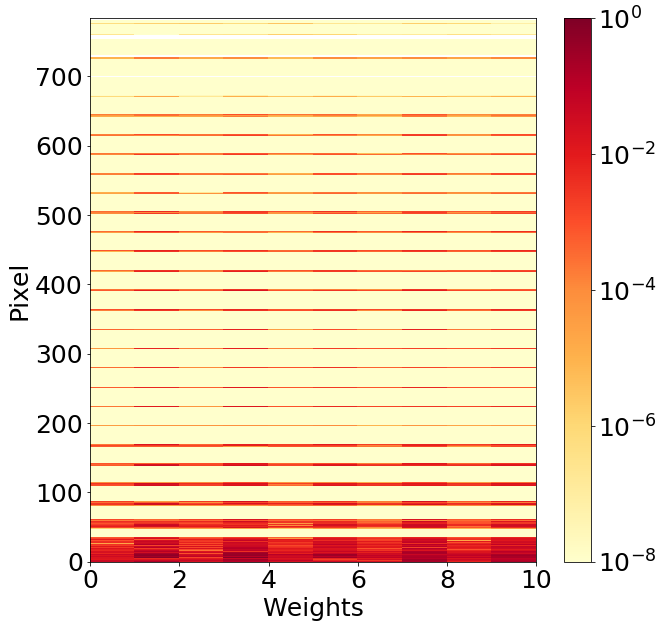

In [25]:
plt_coeff_norm(x_lr)
plt.savefig('lr6.png');

In [26]:
linreg = LinearRegression().fit(A_tr, B_tr)
x_lr_all = linreg.coef_
x_lr_all = x_lr_all.transpose()

## Test Models

In [27]:
def test(A,X,B):
    #Tests the accuracy of X given the image data, A, and labels, B
    
    Bnew = np.matmul(A,X)
    correct = 0;
    
    for i in range(0,len(A)):
        #pred = np.argmax(Bnew[i,:]);
        pred = np.argmin(np.abs(Bnew[i,:]-1))
        if pred == B[i]:
            correct = correct +1;
    
    prcnt = correct/len(A)
    
    print("Correct#: ", correct ,", Percentage Correct: ", prcnt)
    
    return correct, prcnt

### Seeing how well the model fits the training data

In [28]:
test(A_tr,x_psd,labels_tr)
test(A_tr,x_psd_all,labels_tr)

Correct#:  50963 , Percentage Correct:  0.8493833333333334
Correct#:  51109 , Percentage Correct:  0.8518166666666667


(51109, 0.8518166666666667)

In [29]:
test(A_tr, x_lso, labels_tr)
test(A_tr, x_lso_all, labels_tr)

Correct#:  47266 , Percentage Correct:  0.7877666666666666
Correct#:  47168 , Percentage Correct:  0.7861333333333334


(47168, 0.7861333333333334)

In [30]:
test(A_tr, x_rdg, labels_tr)
test(A_tr, x_rdg_all, labels_tr)

Correct#:  48607 , Percentage Correct:  0.8101166666666667
Correct#:  48812 , Percentage Correct:  0.8135333333333333


(48812, 0.8135333333333333)

In [31]:
test(A_tr,x_lr,labels_tr)
test(A_tr,x_lr_all,labels_tr)

Correct#:  48485 , Percentage Correct:  0.8080833333333334
Correct#:  48811 , Percentage Correct:  0.8135166666666667


(48811, 0.8135166666666667)

### Testing the models on the test data

In [32]:
test(A_tt,x_psd,labels_tt)
test(A_tt,x_psd_all,labels_tt)

Correct#:  8514 , Percentage Correct:  0.8514
Correct#:  8534 , Percentage Correct:  0.8534


(8534, 0.8534)

In [33]:
test(A_tt, x_lso, labels_tt)
test(A_tt, x_lso_all, labels_tt)

Correct#:  7931 , Percentage Correct:  0.7931
Correct#:  7917 , Percentage Correct:  0.7917


(7917, 0.7917)

In [34]:
test(A_tt, x_rdg, labels_tt)
test(A_tt, x_rdg_all, labels_tt)

Correct#:  8091 , Percentage Correct:  0.8091
Correct#:  8115 , Percentage Correct:  0.8115


(8115, 0.8115)

In [35]:
test(A_tt,x_lr,labels_tt)
test(A_tt, x_lr_all, labels_tt)

Correct#:  8065 , Percentage Correct:  0.8065
Correct#:  8114 , Percentage Correct:  0.8114


(8114, 0.8114)

# Promote Sparsity

In [36]:
def normvec(x):
    #returns a vector containing the 2-norm of each row of X
    normed = np.zeros(len(x))
    for i in range(0,len(x)):
        normed[i] = np.linalg.norm(x[i,:])
    return normed

In [37]:
def sparsetest(x,train,test,n):
    #finds the indices of the n largest values of x and uses them to truncate the train and test data
    ind = x.argsort()[-n:][::-1]
    train_s = train[:,np.sort(ind)]
    test_s = test[:,np.sort(ind)]
    
    return train_s,test_s,ind

In [38]:
clfl = Lasso(alpha=5)
clfl.fit(A_tr, B_tr)

x5_lso = clfl.coef_
x5_lso = x5_lso.transpose()

Correct#:  39054 , Percentage Correct:  0.6509
Correct#:  6547 , Percentage Correct:  0.6547


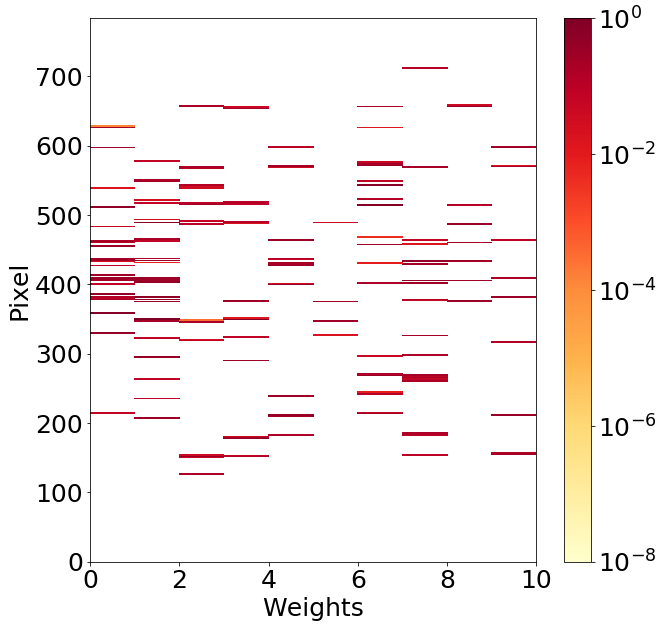

In [39]:
c_lso5, p_lso5 = test(A_tr, x5_lso, labels_tr)
ct_lso5, pt_lso5 = test(A_tt, x5_lso, labels_tt)

plt_coeff_norm(x5_lso)
plt.savefig('lso_sp.png');

In [40]:
normed = normvec(x5_lso)
np.count_nonzero(x5_lso)

191

In [41]:
np.count_nonzero(normed)

137

In [42]:
pixels = [137,100,90,80,70,60,50,50,30,20,10,5]
accuracy = []

for i in range(0,len(pixels)):
    A_tr5, A_tt5, ind = sparsetest(normed,A_tr,A_tt,pixels[i])
    xs_137 = np.linalg.pinv(A_tr5)@B_tr
    crct, pct = test(A_tt5, xs_137, labels_tt)
    accuracy.append(pct)

Correct#:  8208 , Percentage Correct:  0.8208
Correct#:  8104 , Percentage Correct:  0.8104
Correct#:  8080 , Percentage Correct:  0.808
Correct#:  8014 , Percentage Correct:  0.8014
Correct#:  7970 , Percentage Correct:  0.797
Correct#:  7898 , Percentage Correct:  0.7898
Correct#:  7754 , Percentage Correct:  0.7754
Correct#:  7754 , Percentage Correct:  0.7754
Correct#:  7200 , Percentage Correct:  0.72
Correct#:  6716 , Percentage Correct:  0.6716
Correct#:  5174 , Percentage Correct:  0.5174
Correct#:  3468 , Percentage Correct:  0.3468


Text(0, 0.5, 'Pixels Used')

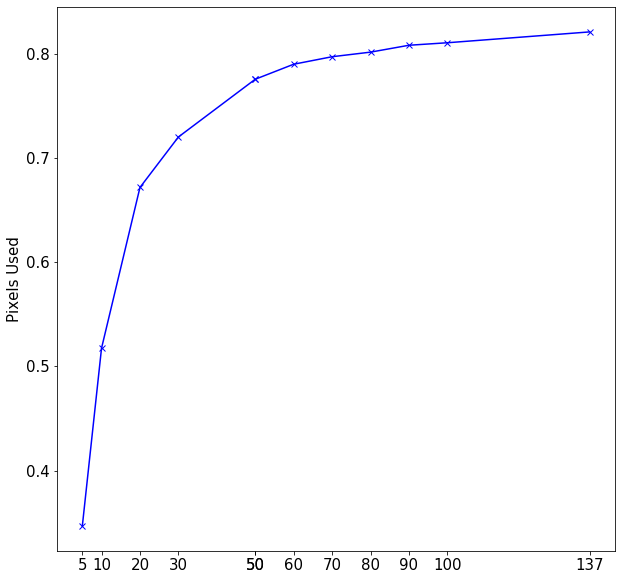

In [43]:
rcParams.update({'font.size': 15})
plt.plot(pixels,accuracy,'-bx')
plt.xticks(pixels)
plt.ylabel('Percent Accuracy')
plt.ylabel('Pixels Used')
plt.savefig('pixelerror.png');

# Individual Digits

In [44]:
def testdig(A,X,B):
    Bnew = np.matmul(A,X)
    correct = 0;
    
    pred = np.round(Bnew)
    
    for i in range(0,len(A)):
        if pred[i] == B[i]:
            correct = correct +1;
    
    prcnt = correct/len(A)
    
    print("Correct#: ", correct ,", Percentage Correct: ", prcnt)
    
    return correct, prcnt

In [45]:
def sparsefit(A,B,alp):
    clf = Lasso(alpha = alp)
    clf.fit(A, B)

    x = clf.coef_
    
    return x

## 0

In [46]:
x0 = sparsefit(A_tr,B_tr[:,0],0.5)

In [47]:
testdig(A_tt,x0,B_tt[:,0])

Correct#:  9601 , Percentage Correct:  0.9601


(9601, 0.9601)

In [48]:
#promoting sparsity
x0s = sparsefit(A_tr,B_tr[:,0],5)
np.count_nonzero(x0s)

28

In [49]:
A_tr5, A_tt5, ind = sparsetest(x0s,A_tr,A_tt,10)
print(ind)

[358 511 329 386 455 413 597 627 427 483]


In [50]:
x0sd = np.linalg.pinv(A_tr5)@B_tr[:,0]

In [51]:
testdig(A_tt5,x0sd,B_tt[:,1])

Correct#:  8123 , Percentage Correct:  0.8123


(8123, 0.8123)

## 1

In [52]:
x1 = sparsefit(A_tr,B_tr[:,1],0.5)

In [53]:
testdig(A_tt,x1,B_tt[:,1])

Correct#:  9377 , Percentage Correct:  0.9377


(9377, 0.9377)

In [54]:
#promoting sparsity
x1s = sparsefit(A_tr,B_tr[:,1],5)
np.count_nonzero(x1s)

26

In [55]:
A_tr5, A_tt5, ind = sparsetest(x1s,A_tr,A_tt,10)
print(ind)

[350 489 378 434 295 406 322 462 517 323]


In [56]:
x1sd = np.linalg.pinv(A_tr5)@B_tr[:,1]

In [57]:
testdig(A_tt5,x1sd,B_tt[:,1])

Correct#:  8865 , Percentage Correct:  0.8865


(8865, 0.8865)

# 2

In [58]:
x2 = sparsefit(A_tr,B_tr[:,2],0.5)

In [59]:
testdig(A_tt,x2,B_tt[:,2])

Correct#:  9451 , Percentage Correct:  0.9451


(9451, 0.9451)

In [60]:
#promoting sparsity
x2s = sparsefit(A_tr,B_tr[:,2],5)
np.count_nonzero(x2s)

23

In [61]:
A_tr5, A_tt5, ind = sparsetest(x2s,A_tr,A_tt,10)
print(ind)

[152 568 516 569 126 543 567 487 517 542]


In [62]:
x2sd = np.linalg.pinv(A_tr5)@B_tr[:,2]
testdig(A_tt5,x2sd,B_tt[:,2])

Correct#:  9024 , Percentage Correct:  0.9024


(9024, 0.9024)

## 3

In [63]:
x3 = sparsefit(A_tr,B_tr[:,3],0.5)

In [64]:
testdig(A_tt,x3,B_tt[:,3])

Correct#:  9475 , Percentage Correct:  0.9475


(9475, 0.9475)

In [65]:
#promoting sparsity
x3s = sparsefit(A_tr,B_tr[:,3],5)
np.count_nonzero(x3s)

20

In [66]:
A_tr5, A_tt5, ind = sparsetest(x3s,A_tr,A_tt,10)
print(ind)

[350 178 376 179 654 152 324 153 349 655]


In [67]:
x3sd = np.linalg.pinv(A_tr5)@B_tr[:,3]
testdig(A_tt5,x3sd,B_tt[:,3])

Correct#:  8990 , Percentage Correct:  0.899


(8990, 0.899)

## 4

In [68]:
x4 = sparsefit(A_tr,B_tr[:,4],0.5)

In [69]:
testdig(A_tt,x4,B_tt[:,4])

Correct#:  9163 , Percentage Correct:  0.9163


(9163, 0.9163)

In [70]:
#promoting sparsity
x4s = sparsefit(A_tr,B_tr[:,4],5)
np.count_nonzero(x4s)

17

In [71]:
A_tr5, A_tt5, ind = sparsetest(x4s,A_tr,A_tt,10)
print(ind)

[400 428 464 429 430 437 463 436 401 267]


In [72]:
x4sd = np.linalg.pinv(A_tr5)@B_tr[:,4]
testdig(A_tt5,x4sd,B_tt[:,4])

Correct#:  9018 , Percentage Correct:  0.9018


(9018, 0.9018)

## 5

In [73]:
x5 = sparsefit(A_tr,B_tr[:,5],0.5)

In [74]:
testdig(A_tt,x5,B_tt[:,5])

Correct#:  9185 , Percentage Correct:  0.9185


(9185, 0.9185)

In [75]:
#promoting sparsity
x5s = sparsefit(A_tr,B_tr[:,5],5)
np.count_nonzero(x5s)

5

In [76]:
A_tr5, A_tt5, ind = sparsetest(x5s,A_tr,A_tt,5)
print(ind)

[375 347 783 255 264]


In [77]:
x5sd = np.linalg.pinv(A_tr5)@B_tr[:,5]
testdig(A_tt5,x5sd,B_tt[:,5])

Correct#:  9108 , Percentage Correct:  0.9108


(9108, 0.9108)

## 6

In [78]:
x6 = sparsefit(A_tr,B_tr[:,6],0.5)

In [79]:
testdig(A_tt,x6,B_tt[:,6])

Correct#:  9624 , Percentage Correct:  0.9624


(9624, 0.9624)

In [80]:
#promoting sparsity
x6s = sparsefit(A_tr,B_tr[:,6],5)
np.count_nonzero(x6s)

25

In [81]:
A_tr5, A_tt5, ind = sparsetest(x6s,A_tr,A_tt,10)
print(ind)

[514 543 572 457 575 573 402 523 549 576]


In [82]:
x6sd = np.linalg.pinv(A_tr5)@B_tr[:,6]
testdig(A_tt5,x6sd,B_tt[:,6])

Correct#:  9042 , Percentage Correct:  0.9042


(9042, 0.9042)

## 7

In [83]:
x7 = sparsefit(A_tr,B_tr[:,7],0.5)

In [84]:
testdig(A_tt,x7,B_tt[:,7])

Correct#:  9355 , Percentage Correct:  0.9355


(9355, 0.9355)

In [85]:
#promoting sparsity
x7s = sparsefit(A_tr,B_tr[:,7],5)
np.count_nonzero(x7s)

26

In [86]:
A_tr5, A_tt5, ind = sparsetest(x7s,A_tr,A_tt,10)
print(ind)

[268 266 326 269 260 298 261 264 712 263]


In [87]:
x7sd = np.linalg.pinv(A_tr5)@B_tr[:,7]
testdig(A_tt5,x7sd,B_tt[:,7])

Correct#:  9137 , Percentage Correct:  0.9137


(9137, 0.9137)

## 8

In [88]:
x8 = sparsefit(A_tr,B_tr[:,8],0.5)

In [89]:
testdig(A_tt,x8,B_tt[:,8])

Correct#:  9537 , Percentage Correct:  0.9537


(9537, 0.9537)

In [90]:
#promoting sparsity
x8s = sparsefit(A_tr,B_tr[:,8],5)
np.count_nonzero(x8s)

10

In [91]:
A_tr5, A_tt5, ind = sparsetest(x8s,A_tr,A_tt,10)
print(ind)

[657 656 487 376 405 433 460 515 514 658]


In [92]:
x8sd = np.linalg.pinv(A_tr5)@B_tr[:,8]
testdig(A_tt5,x8sd,B_tt[:,8])

Correct#:  9026 , Percentage Correct:  0.9026


(9026, 0.9026)

## 9

In [93]:
x9 = sparsefit(A_tr,B_tr[:,9],0.5)

In [94]:
testdig(A_tt,x9,B_tt[:,9])

Correct#:  9174 , Percentage Correct:  0.9174


(9174, 0.9174)

In [95]:
#promoting sparsity
x9s = sparsefit(A_tr,B_tr[:,9],5)
np.count_nonzero(x9s)

11

In [96]:
A_tr5, A_tt5, ind = sparsetest(x9s,A_tr,A_tt,10)
print(ind)

[211 381 409 317 464 783 268 267 266 265]


In [97]:
x9sd = np.linalg.pinv(A_tr5)@B_tr[:,9]
testdig(A_tt5,x9sd,B_tt[:,9])

Correct#:  8991 , Percentage Correct:  0.8991


(8991, 0.8991)